In [1]:
episodefile = open("../data/EpisodeList.txt","r")
episodeList = []

for line in episodefile:
    episodeList.append(line.strip().lower().replace(",",""))

SeasonList = [10,10,10,10,10,10,7,6]
episodeTuple = []
ekstranumb = 0
for numb in range(len(SeasonList)):
    for i in range(SeasonList[numb]):
        episodeTuple.append((numb+1, episodeList[i+ekstranumb]))
    ekstranumb += SeasonList[numb]

In [3]:
import lyricsgenius
genius = lyricsgenius.Genius("Apa5yYNZVRkIvn1izsQWN5l957pSR9jiG24s8ExAPKE9FHY9gdq4W8P7GPavWn1n")
artist = genius.search_artist("Game of Thrones")
artist.save_lyrics()

Searching for songs by Game of Thrones...

Song 1: "Winter is Coming"
Song 2: "Tyrion’s Courtroom Speech from The Laws of Gods and Men"
Song 3: "Kill the Boy"
Song 4: "Mother’s Mercy"
Song 5: "The Kingsroad"
Song 6: "The House of Black and White"
Song 7: "The Children"
Song 8: "Hardhome"
Song 9: "Liste des personnages"
Song 10: "The Wars to Come"
Song 11: "The Queen’s Justice"
Song 12: "Lord Snow"
Song 13: "High Sparrow"
Song 14: "The Dance of Dragons"
Song 15: "The Wolf and the Lion"
Song 16: "Cripples, Bastards and Broken Things"
Song 17: "The Winds of Winter"
Song 18: "Battle of the Bastards"
Song 19: "Book of the Stranger"
Song 20: "The Door"
Song 21: "The Red Woman"
Song 22: "You Win or You Die"
Song 23: "The North Remembers"
Song 24: "The Pointy End"
Song 25: "The Mountain and the Viper"
Song 26: "Unbowed, Unbent, Unbroken"
Song 27: "Oathbreaker"
Song 28: "The Gift"
Song 29: "Dragonstone"
Song 30: "A Golden Crown"
Song 31: "Fire and Blood"
Song 32: "The Rains of Castamere"
Song 3

In [2]:
import json
jFile = open("Lyrics_GameofThrones.json", "r")
j = json.load(jFile)

#Ignore this
#Dont even worry about it
#Just a simple Dict comprehension, no need to analyze it
LyricsListDict = {j["songs"][w]["title_with_featured"].lower().replace(",",""):j["songs"][w]["lyrics"].encode("UTF-8").decode("UTF-8") 
                    for w in range(len(j["songs"])) 
                    if j["songs"][w]["title_with_featured"].lower().replace(",","") in episodeList}



In [3]:
SeasonDict = dict()
#SeasonDict format
# {Title:{Season:SeasonNumber,Script:ScriptText}}
for season, title in episodeTuple:
    SeasonDict[title] = { "season": season,"script":LyricsListDict[title]}
print(SeasonDict['winter is coming'])

{'season': 1, 'script': '35 ContributorsWinter is Coming LyricsEPISODE 1 - WINTER IS COMING[First scene opens with three Rangers riding through a tunnel, leaving the Wall, and going into the woods. (Eerie music in background) One Ranger splits off and finds a campsite full of mutilated bodies, including a child hanging from a tree branch. A birds-eye view shows the bodies arranged in a shield-like pattern. The Ranger rides back to the other two.]\n\nWAYMAR ROYCE: What d’you expect? They’re savages. One lot steals a goat from another lot and before you know it, they’re ripping each other to pieces.\n\nWILL: I’ve never seen wildlings do a thing like this. I’ve never seen a thing like this, not ever in my life.\n\nWAYMAR ROYCE: How close did you get?\n\nWILL: Close as any man would.\n\nGARED: We should head back to the wall.\n\nROYCE: Do the dead frighten you?\n\nGARED: Our orders were to track the wildlings. We tracked them. They won’t trouble us no more.\n\nROYCE: You don’t think he’ll 

In [4]:

def sceneNameChecker(screenLine:str, i:int, lineSplit:str, sceneList:list):
    
    sceneName = None
    

    if lineSplit[0].upper() == "CUT TO":
        sceneName = lineSplit[1].strip()

    elif screenLine.startswith('EXT'):
        sceneName = screenLine.strip()[4:].strip()

    elif screenLine.startswith('INT'):
        sceneName = screenLine.strip()[4:].strip()

    elif screenLine.strip().startswith("--------"):
        sceneName = "Unnamed Scene"

    elif screenLine.upper().strip().startswith("CUT TO"):
        sceneName = screenLine.strip()[7:].strip()

    elif "SCENE SHIFTS" in screenLine.upper() or "SCENE CHANGES" in screenLine.upper():
        sceneName = "Unnamed Scene"
        
    elif "NEWSCENE" in screenLine.upper():
        sceneName = "Unnamed Scene"
    elif i == 0:
        
        sceneName = "Unnamed Scene"

    

    #Giving the sceneName an extra number if the sceneName occurs multiple times
    if sceneName is not None:
        if str(sceneName) in sceneList:
            try:
                sceneNameOld = sceneName
                sceneName = str(sceneName) + "_" + str(sceneList.count(sceneName))
                sceneList.append(str(sceneNameOld))
                
            except TypeError as error:
                print("Error:", sceneName)
            
        else:
            sceneList.append(str(sceneName))
        
        return True, str(sceneName), sceneList
       
        
    return False, False, False


def createDataframefromDict(screenplayDict:dict):
 
    dfcolumns = ['Person','SeasonNr','EpisodeID','EpisodeTitle','Scene','ScreenLine']


    sceneList = []
    allLines = []
    episodeID = 0
    

    for title in screenplayDict:

        episodeTitle = title
        episodeID += 1
        seasonNr = screenplayDict[title]['season']

        sceneName = None

        screenLines = screenplayDict[title]['script'].replace("\n\n\n", "NEWSCENE\n")
        screenLines = screenLines.split("\n")[1:]
        

        for i in range(len(screenLines)):
            
            line = screenLines[i]

            lineSplit = line.strip().split(":")
            
            if len(lineSplit) > 1:

                if sceneNameChecker(line,i,lineSplit,sceneList)[0] is True:
                    _, sceneName, sceneList = sceneNameChecker(line,i,lineSplit, sceneList)
                    #print("Scene:", sceneName, "episode:", episodeID)
                    if "Scene shifts" in str(line) and len(line[0].strip()) > 0:

                        print(str(line))                

                elif len(lineSplit) >= 2:
                    if sceneName is None:
                        _, sceneName, sceneList = sceneNameChecker(line,0,lineSplit, sceneList)

                    person = str(lineSplit[0].split("(")[0].strip()).upper()
                    screenLine = str(lineSplit[1])
                    
                    newEntry = [person, seasonNr, episodeID, episodeTitle, sceneName, screenLine]
                    allLines.append(newEntry)
                    
                
            else:
                
                if "SCENE SHIFTS" in str(line).upper() or "SCENE CHANGES" in str(line).upper() and len(line[0].strip()) > 0:
                    
                    _, sceneName, sceneList = sceneNameChecker(line,0,lineSplit, sceneList)
                    
            


    df = pd.DataFrame(allLines,columns=dfcolumns)
    return df

In [5]:
import numpy as np
def format_name(person_list: list, verbose = False) -> list:
    metadata = pd.read_csv('../data/characher_metadata2.csv')
    c2n = pd.read_csv('../data/characterToName.csv', header = None)

    # 'One comprehenssion to rule them all, One comprehenssion to find them, One comprehenssion to bring them all and in the darkness bind them.
    alias2name = {alias.strip().lower():name.strip().lower() for alias, name in zip(c2n.iloc[:,0],c2n.iloc[:,1]) if alias is not np.nan and name is not np.nan}
    metadata_ls = [person.lower() for person in metadata.iloc[:,0]]
    metadata_uniq = set(metadata_ls)

    
    valid_persons = []
    for person in person_list:
        person = person.lower()
        person = person.replace('king', '')
        person = person.replace('young', '')
        person = person.replace('ser', '')
        person = person.replace('lord', '')
        person = person.replace('maester', '')
        person = person.replace('grand maester', '')
        person = person.strip()
    
        if person in metadata_uniq:
            valid_persons.append(person)
    #ic(valid_persons)
            
        if person not in metadata_uniq:
            if person in alias2name:
                valid_persons.append(alias2name[person])
                if verbose and person != alias2name[person]:
                    print(f'{person} -> {alias2name[person]}')
                    pass
            else:
                valid_persons.append(np.nan)
                if verbose:
                    print(f'{person} -> nan')
    return valid_persons

In [6]:
import pandas as pd
df = createDataframefromDict(SeasonDict)
#print(df)
df["Person"] = format_name(df.Person, verbose = False)

pd.DataFrame.dropna(df,axis=0, how = 'any', inplace = True)
print(df)



                 Person  SeasonNr  EpisodeID      EpisodeTitle  \
0          waymar royce         1          1  winter is coming   
1                  will         1          1  winter is coming   
2          waymar royce         1          1  winter is coming   
3                  will         1          1  winter is coming   
4                 gared         1          1  winter is coming   
...                 ...       ...        ...               ...   
25035               sam         8         73   the iron throne   
25036             bronn         8         73   the iron throne   
25037  brienne of tarth         8         73   the iron throne   
25038             bronn         8         73   the iron throne   
25039  tyrion lannister         8         73   the iron throne   

                         Scene  \
0                Unnamed Scene   
1                Unnamed Scene   
2                Unnamed Scene   
3                Unnamed Scene   
4                Unnamed Scene   
...

In [7]:
lineDict = dict()

# LineDict -> key: Scene -> key: person -> value: lines
#                        -> value: seasonnr
#                        -> value: EpisodeID
#                        -> value: EpisodeTitle

for scene, person, lines, seasonNr, episodeID, episodeTitle in zip(df.Scene, df.Person, df.ScreenLine, df.SeasonNr, df.EpisodeID, df.EpisodeTitle):
    if scene not in lineDict:
        lineDict[scene] = {}
  
    if person not in lineDict[scene]:
        lineDict[scene][person] = {}
        lineDict[scene][person]["SeasonNr"] = seasonNr
        lineDict[scene][person]["EpisodeID"] = episodeID
        lineDict[scene][person]["EpisodeTitle"] = episodeTitle
        
    if "lines" not in lineDict[scene][person]: 
        lineDict[scene][person]["lines"] = []
    

    lineDict[scene][person]["lines"].append(lines)


print("Nr of scenes in dict:", len(lineDict))
#lineDict["Unnamed Scene"]




Nr of scenes in dict: 991


In [8]:
import networkx as nx

G = nx.DiGraph()
PersonList = set(list(df.Person))
SceneList = set(list(df.Scene))

personList = list(lineDict[scene])
G.add_nodes_from(personList)


for scene in lineDict:    
    connectedPersons = list(lineDict[scene])

    for person in lineDict[scene]:
        lines = lineDict[scene][person]["lines"]
        
        if connectedPersons is not None:
            for name in connectedPersons:
                if person != name:
                    G.add_edge(person, name, lines = lines, weight = len(lines), seasonNr = lineDict[scene][person]["SeasonNr"], episodeTitle= lineDict[scene][person]["EpisodeTitle"])




print(len(G.nodes()))
print(len(G.edges()))

344
13168


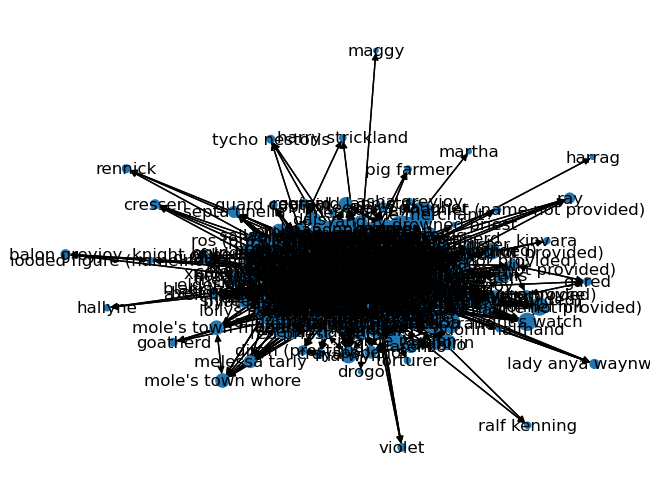

In [403]:
d = dict(G.degree)
pos = nx.kamada_kawai_layout(G)


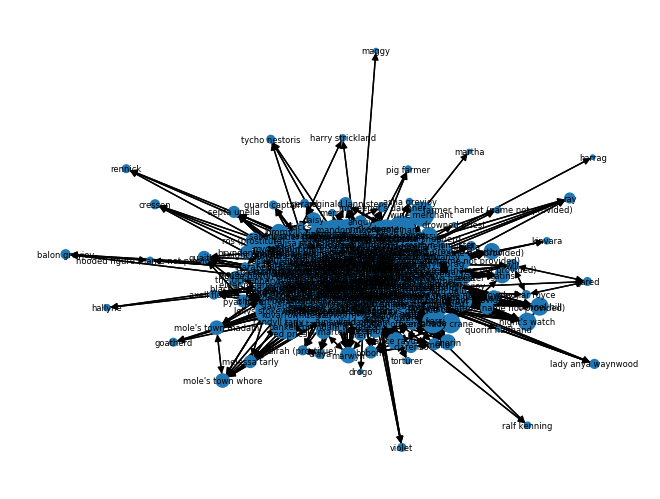

In [405]:
nx.draw(G, pos = pos, node_size=[v * 5 for v in d.values()], with_labels = True, font_size = 6)

In [406]:
nx.draw(G, pos = pos, node_size=[v * 5 for v in d.values()])

In [9]:
import networkx as nx
from fa2 import ForceAtlas2
import matplotlib.pyplot as plt

forceatlas2 = ForceAtlas2(
                        # Behavior alternatives
                        outboundAttractionDistribution=True,  # Dissuade hubs
                        linLogMode=False,  # NOT IMPLEMENTED
                        adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                        edgeWeightInfluence=1.0,

                        # Performance
                        jitterTolerance=1.0,  # Tolerance
                        barnesHutOptimize=True,
                        barnesHutTheta=1.2,
                        multiThreaded=False,  # NOT IMPLEMENTED

                        # Tuning
                        scalingRatio=10.0,
                        strongGravityMode=False,
                        gravity=1.0,

                        # Log
                        verbose=True)

positions = forceatlas2.forceatlas2_networkx_layout(G, pos=None, iterations=2000)


ModuleNotFoundError: No module named 'fa2'

In [33]:
DegreeList = []
labels = {}
for (Character, attributes) in G.nodes(data=True):
#    if attributes["coast"] == "West":
#        ColourList.append("red")
#    else:
#        ColourList.append("blue")
    if G.degree()[Character] > 150:
        labels[Character] = Character
    
    DegreeList.append(G.degree()[Character])


In [34]:
print(labels)

{'tyrion lannister': 'tyrion lannister', 'sam': 'sam', 'davos seaworth': 'davos seaworth', 'bronn': 'bronn', 'bran stark': 'bran stark', 'brienne of tarth': 'brienne of tarth', 'sansa stark': 'sansa stark', 'eddard stark': 'eddard stark', 'jon snow': 'jon snow', 'robb stark': 'robb stark', 'rodrik cassel': 'rodrik cassel', 'catelyn stark': 'catelyn stark', 'theon greyjoy': 'theon greyjoy', 'jaime lannister': 'jaime lannister', 'cersei lannister': 'cersei lannister', 'luwin': 'luwin', 'arya stark': 'arya stark', 'ros': 'ros', 'varys': 'varys', 'daenerys targaryen': 'daenerys targaryen', 'jorah mormont': 'jorah mormont', 'sandor clegane': 'sandor clegane', 'joffrey baratheon': 'joffrey baratheon', 'myrcella baratheon': 'myrcella baratheon', 'renly baratheon': 'renly baratheon', 'petyr baelish': 'petyr baelish', 'pycelle': 'pycelle', 'jeor mormont': 'jeor mormont', 'grenn': 'grenn', 'pypar': 'pypar', 'barristan selmy': 'barristan selmy', 'lancel lannister': 'lancel lannister', 'rakharo': 

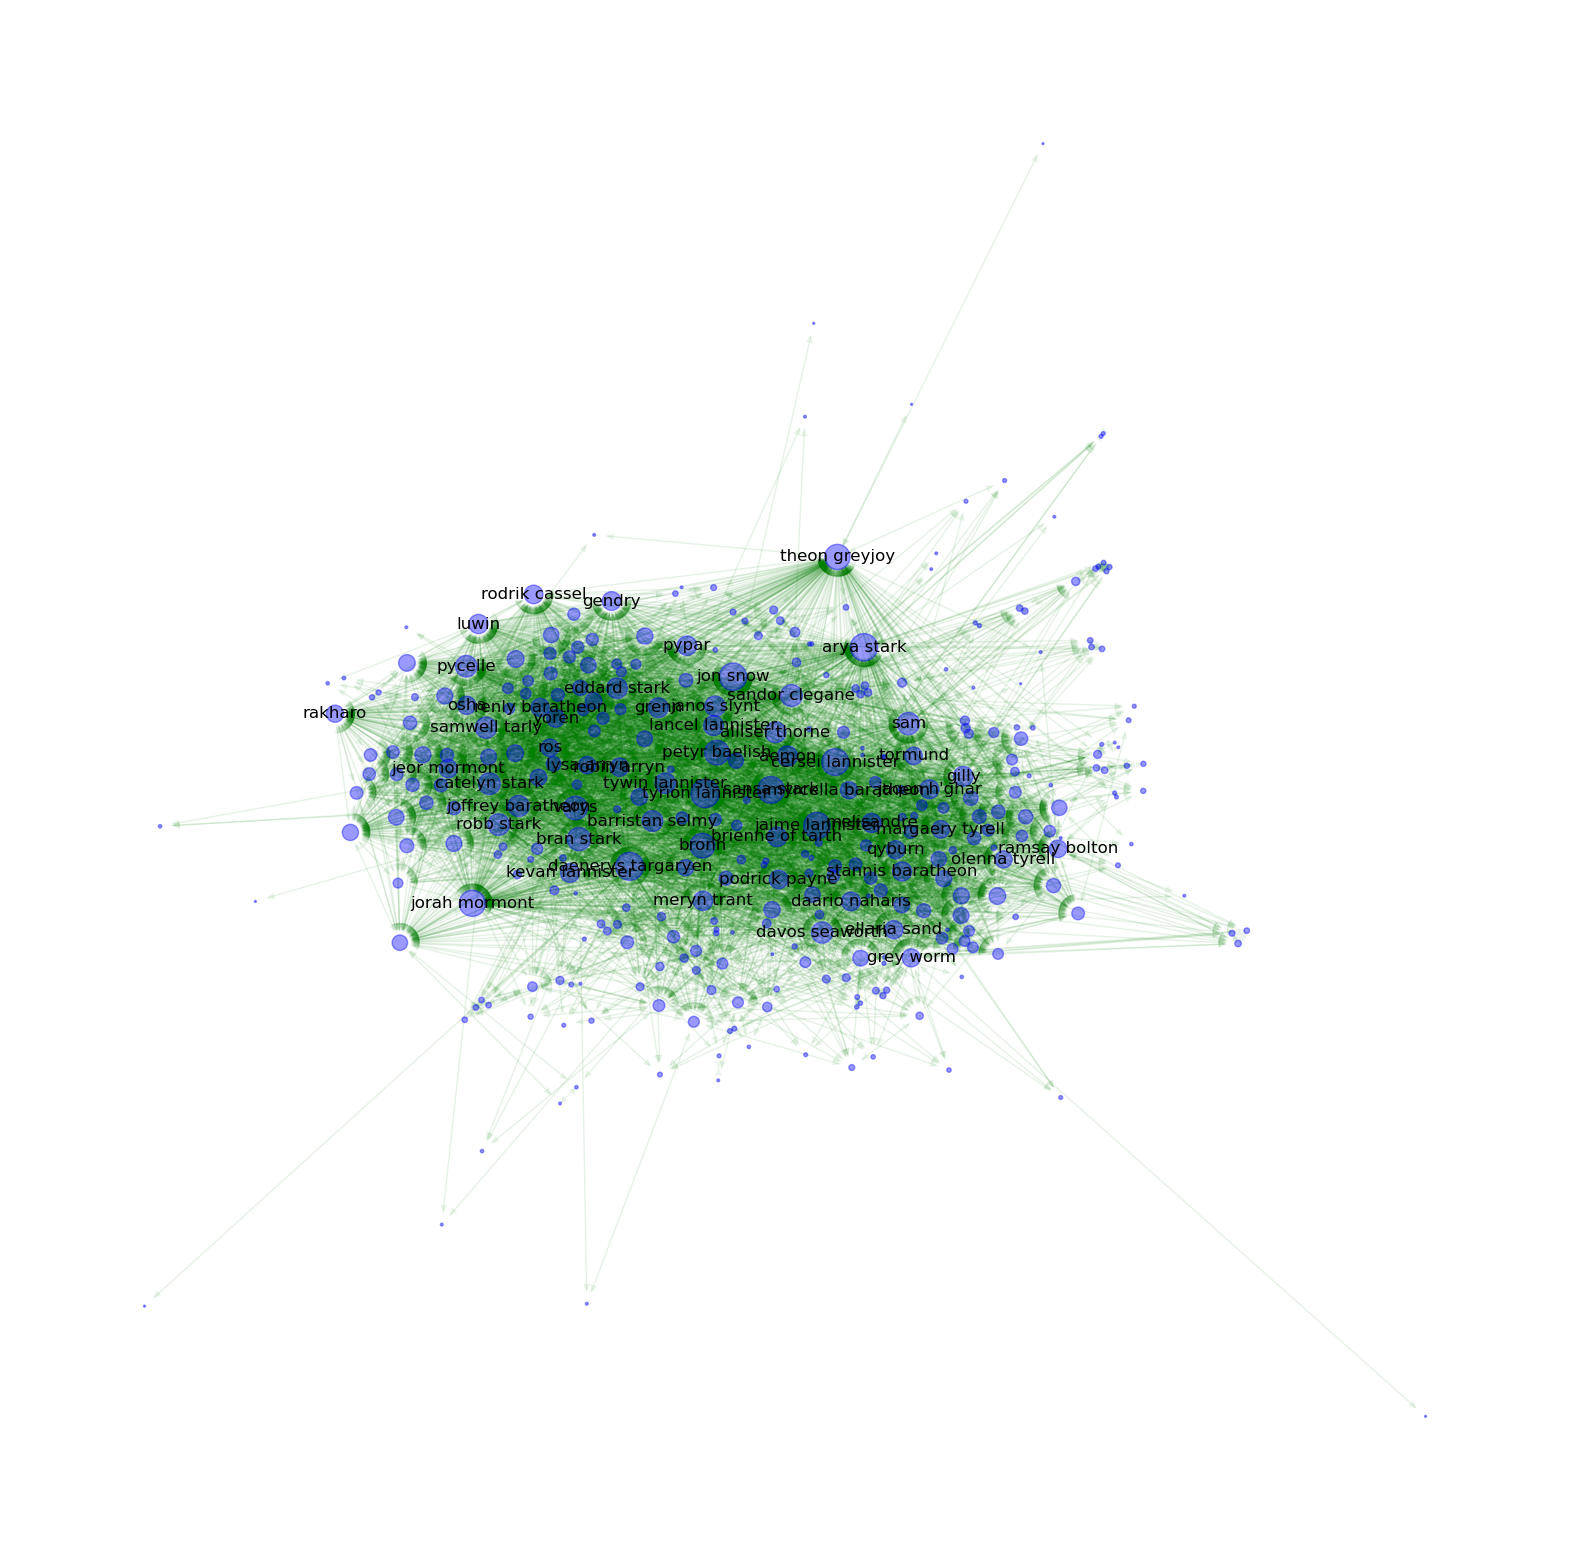

In [35]:
plt.figure(figsize=(20,20))
nx.draw_networkx_nodes(G, positions, node_size=DegreeList, node_color="blue", alpha=0.4)
nx.draw_networkx_edges(G, positions, edge_color="green", alpha=0.05)
nx.draw_networkx_labels(G, positions, labels=labels)
plt.axis('off')
plt.show()

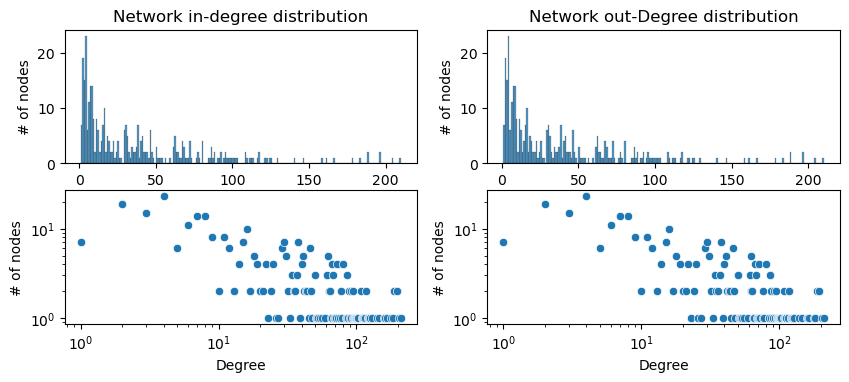

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
INdegree_sequence = sorted((d for n, d in G.in_degree()), reverse =True)
OUTdegree_sequence = sorted((d for n, d in G.out_degree()), reverse =True)

INbins = np.arange(min(INdegree_sequence), max(INdegree_sequence)+1)
OUTbins = np.arange(min(OUTdegree_sequence), max(OUTdegree_sequence)+1)

pmf = [(INdegree_sequence == bin).sum() for bin in INbins]
pmf = np.array(pmf)

pmfOut = [(OUTdegree_sequence == bin).sum() for bin in OUTbins]
pmfOut = np.array(pmfOut)

plt.figure(figsize=(10,8))
plt.subplot(221)
sns.histplot(INdegree_sequence,binwidth = 1)
plt.title("Network in-degree distribution")
plt.ylabel("# of nodes")
plt.xlabel("Degree")


plt.subplot(222)
sns.histplot(OUTdegree_sequence,binwidth=1)
plt.title("Network out-Degree distribution")
plt.ylabel("# of nodes")
plt.xlabel("Degree")

# plt.subplot(423)
# sns.scatterplot(y = pmf, x = INbins)
# plt.ylabel("# of nodes")
# plt.yscale("log")
# plt.xscale("log")
# plt.xlabel("Degree")


# plt.subplot(424)
# sns.scatterplot(y = pmfOut, x = OUTbins)
# plt.ylabel("# of nodes")
# plt.xlabel("Degree")
# plt.yscale("log")
# plt.xscale("log")

plt.show()